## Load and convince

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## train_df
train_df = pd.read_csv("../data/train.csv")

In [4]:
print(train_df.shape)
train_df.head()

(4658147, 6)


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [10]:
## number of molecule
train_df.molecule_name.unique().shape

(85003,)

In [5]:
## test_df 
test_df = pd.read_csv("../data/test.csv")
test_df.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [11]:
test_df.molecule_name.unique().shape

(45772,)

In [12]:
## no old molecule in test data
np.intersect1d(train_df.molecule_name.unique(),test_df.molecule_name.unique(),assume_unique=True)

array([], dtype=object)

In [19]:
## the structures
struc = pd.read_csv("../data/structures.csv")
struc.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [19]:
## extra structures
np.intersect1d(struc.molecule_name.unique(),test_df.molecule_name.unique(),assume_unique=True).shape

(45772,)

In [18]:
np.intersect1d(struc.molecule_name.unique(),train_df.molecule_name.unique(),assume_unique=True).shape

(85003,)

In [23]:
## sample solution
samp = pd.read_csv('../data/sample_submission.csv')
samp.head()

,id,scalar_coupling_constant
0,4658147,0
1,4658148,0
2,4658149,0
3,4658150,0
4,4658151,0


## Check features

In [26]:
## how many bound type it has 
train_df.type.value_counts()
## large enough for training

3JHC    1510379
2JHC    1140674
1JHC     709416
3JHH     590611
2JHH     378036
3JHN     166415
2JHN     119253
1JHN      43363
Name: type, dtype: int64

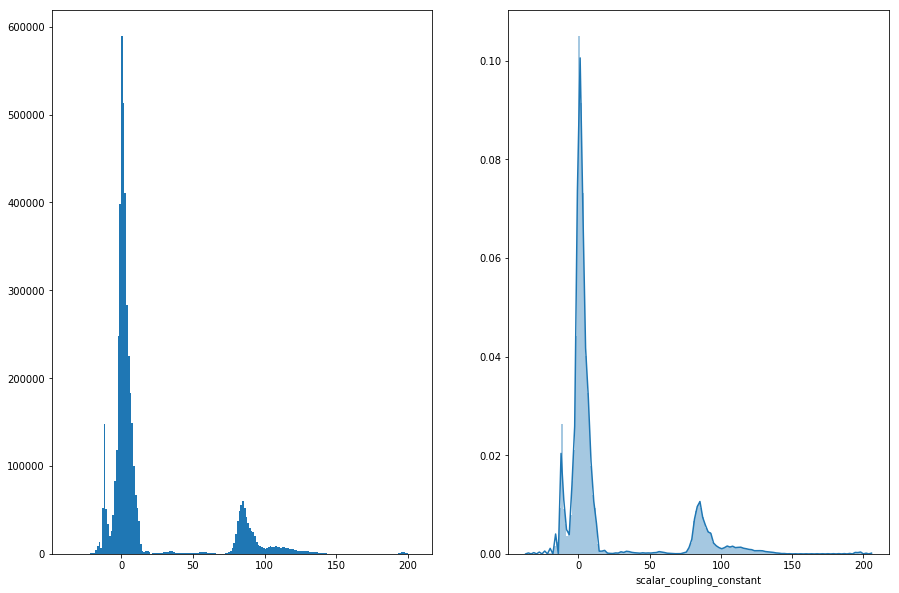

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].hist(train_df.scalar_coupling_constant,bins=200)
sns.distplot(train_df.scalar_coupling_constant,bins=200,ax=ax[1])
# majorly two cluster of coefficient

In [18]:
train_df.groupby('type').scalar_coupling_constant.mean()
## differ from the coupling type (highly correlated)

type
1JHC    94.976153
1JHN    47.479884
2JHC    -0.270624
2JHH   -10.286605
2JHN     3.124754
3JHC     3.688470
3JHH     4.771023
3JHN     0.990730
Name: scalar_coupling_constant, dtype: float64

In [22]:
def count_radius(row):
    return np.sqrt(row.x**2 + row.y**2 + row.z**2)
struc["radius"] = struc.apply(count_radius,axis=1)
struc.head()

,molecule_name,atom_index,atom,x,y,z,radius
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,1.085908
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,0.006701
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,1.779373
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,1.776603
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,1.778648
